# Creating classification and regression trees

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
features = iris.feature_names

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, 
                        shuffle=True,
                        random_state=1)

In [3]:
import numpy as np
from sklearn import tree
for depth in range(1,10):
    tree_classifier = tree.DecisionTreeClassifier(
        max_depth=depth, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, 
                                    X, y, 
                                    scoring='accuracy', 
                                    cv=crossvalidation))
    print('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 1 Accuracy: 0.580
Depth: 2 Accuracy: 0.913
Depth: 3 Accuracy: 0.920
Depth: 4 Accuracy: 0.940
Depth: 5 Accuracy: 0.920


In [4]:
tree_classifier = tree.DecisionTreeClassifier(
    min_samples_split=30, min_samples_leaf=10, 
    random_state=0)
tree_classifier.fit(X,y)
score = np.mean(cross_val_score(tree_classifier, X, y, 
                                scoring='accuracy', 
                                cv=crossvalidation))
print('Accuracy: %.3f' % score)

Accuracy: 0.913


In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names

from sklearn.tree import DecisionTreeRegressor
regression_tree = tree.DecisionTreeRegressor(
    min_samples_split=30, min_samples_leaf=10, 
    random_state=0)
regression_tree.fit(X,y)
score = np.mean(cross_val_score(regression_tree, 
                   X, y, 
                   scoring='neg_mean_squared_error', 
                   cv=crossvalidation))
print('Mean squared error: %.3f' % abs(score))

Mean squared error: 22.593


# Getting Lost in a Random Forest

## Making machine learning accessible to all

In [6]:
from sklearn.datasets import load_digits
digit = load_digits()
X, y = digit.data, digit.target

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
tree_classifier = DecisionTreeClassifier(random_state=0)
crossvalidation = KFold(n_splits=5, shuffle=True, 
                        random_state=1)
bagging = BaggingClassifier(tree_classifier, 
                            max_samples=0.7, 
                            max_features=0.7, 
                            n_estimators=300)
scores = np.mean(cross_val_score(bagging, X, y, 
                                 scoring='accuracy', 
                                 cv=crossvalidation))
print ('Accuracy: %.3f' % scores)

Accuracy: 0.966


## Working with a random forest classifier

In [8]:
X, y = digit.data, digit.target
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, shuffle=True, 
                        random_state=1)
RF_cls = RandomForestClassifier(n_estimators=300,
                               random_state=1)
score = np.mean(cross_val_score(RF_cls, X, y, 
                                scoring='accuracy', 
                                cv=crossvalidation))
print('Accuracy: %.3f' % score)

Accuracy: 0.977


In [9]:
from sklearn.model_selection import validation_curve
param_range = [10, 50, 100, 200, 300, 500, 800, 1000, 1500]
crossvalidation = KFold(n_splits=3, 
                        shuffle=True, 
                        random_state=1)
RF_cls = RandomForestClassifier(n_estimators=300,
                               random_state=0)
train_scores, test_scores = validation_curve(RF_cls, X, y,
                                  'n_estimators', 
                                  param_range=param_range, 
                                  cv=crossvalidation, 
                                  scoring='accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

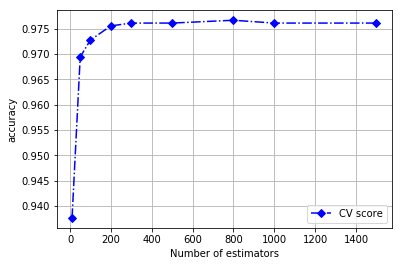

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(param_range, mean_test_scores, 
         'bD-.', label='CV score')
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints= 1)
plt.show()

## Working with a random forest regressor

In [11]:
X, y = boston.data, boston.target
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
RF_rg = RandomForestRegressor (n_estimators=300, 
                               random_state=1)
crossvalidation = KFold(n_splits=5, shuffle=True, 
                        random_state=1)
score = np.mean(cross_val_score(RF_rg, X, y, 
                    scoring='neg_mean_squared_error', 
                    cv=crossvalidation))
print('Mean squared error: %.3f' % abs(score))

Mean squared error: 12.028


## Optimizing a random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
X, y = digit.data, digit.target
crossvalidation = KFold(n_splits=5, shuffle=True, 
                        random_state=1)
RF_cls = RandomForestClassifier(random_state=1)
scorer = 'accuracy'

In [13]:
from sklearn.model_selection import GridSearchCV
max_features = [X.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [50, 100, 300]
search_grid =  {'n_estimators':n_estimators,
                'max_features': max_features, 
                'min_samples_leaf': min_samples_leaf}
search_func = GridSearchCV(estimator=RF_cls, 
                           param_grid=search_grid, 
                           scoring=scorer, 
                           cv=crossvalidation)
search_func.fit(X, y)
best_params = search_func.best_params_
best_score = search_func.best_score_
print('Best parameters: %s' % best_params)
print('Best accuracy: %.3f' % best_score)

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Best accuracy: 0.978


# Boosting predictions

In [14]:
X, y = digit.data, digit.target

## Knowing that many weak predictors win 

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
ada = AdaBoostClassifier(n_estimators=1000, 
                         learning_rate=0.01, 
                         random_state=1)
crossvalidation = KFold(n_splits=5, shuffle=True, 
                        random_state=1)
score = np.mean(cross_val_score(ada, X, y, 
                                scoring='accuracy', 
                                cv=crossvalidation))
print('Accuracy: %.3f' % score)

Accuracy: 0.754


## Creating a gradient boosting classifier

In [16]:
X, y = digit.data, digit.target
crossvalidation = KFold(n_splits=5, 
                        shuffle=True, 
                        random_state=1)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
GBC = GradientBoostingClassifier(n_estimators=300, 
                                 subsample=1.0, 
                                 max_depth=2, 
                                 learning_rate=0.1, 
                                 random_state=1)
score = np.mean(cross_val_score(GBC, X, y, 
                                scoring='accuracy', 
                                cv=crossvalidation))
print('Accuracy: %.3f' % score)

Accuracy: 0.972


## Creating a gradient boosting regressor

In [18]:
X, y = boston.data, boston.target

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
GBR = GradientBoostingRegressor(n_estimators=1000, 
                                subsample=1.0, 
                                max_depth=3, 
                                learning_rate=0.01, 
                                random_state=1)
crossvalidation = KFold(n_splits=5, 
                        shuffle=True, 
                        random_state=1)
score = np.mean(cross_val_score(GBR, X, y, 
                                scoring='neg_mean_squared_error', 
                                cv=crossvalidation))
print('Mean squared error: %.3f' % abs(score))

Mean squared error: 10.094


## Using GBM hyper-parameters

In [20]:
X, y = boston.data, boston.target
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, shuffle=True, 
                        random_state=1)
GBR = GradientBoostingRegressor(n_estimators=1000, 
                                subsample=1.0, 
                                max_depth=3, 
                                learning_rate=0.01, 
                                random_state=1)

In [21]:
from sklearn.model_selection import GridSearchCV
subsample = [1.0, 0.9]
max_depth = [2, 3, 5]
n_estimators = [500 , 1000, 2000]
search_grid =  {'subsample': subsample, 
                'max_depth': max_depth, 
                'n_estimators': n_estimators}
search_func = GridSearchCV(estimator=GBR, 
             param_grid=search_grid, 
             scoring='neg_mean_squared_error',
             cv=crossvalidation)
search_func.fit(X,y)

best_params = search_func.best_params_
best_score = abs(search_func.best_score_)
print('Best parameters: %s' % best_params)
print('Best mean squared error: %.3f' % best_score)

Best parameters: {'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.9}
Best mean squared error: 9.324
